Given a 10 second window of non-zero accelerometer data, predict whether the TAC is above 0.08 (intoxicated).


I did research online for related studies. I found the original research by XYZ, but chose to not use it as reference to be respectful to the nature of this exercise. To not account to cheating.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/clean_tac/BK7610_clean_TAC.csv')
df

,timestamp,TAC_Reading
0,1493718714,-0.000482
1,1493720697,0.001573
2,1493721027,0.002144
3,1493721357,0.000877
4,1493721686,-0.001145
5,1493722016,-0.002159
6,1493722345,-0.001033
7,1493722674,0.001808
8,1493723003,0.004542
9,1493724832,0.005185


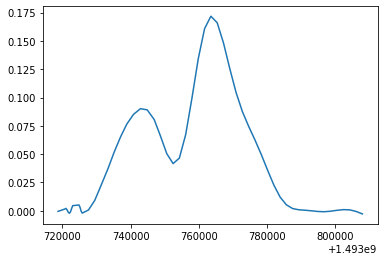

In [4]:
plt.plot(df['timestamp'], df['TAC_Reading'])

In [11]:
from datetime import datetime
print(datetime.fromtimestamp(1493807899))

2017-05-03 03:38:19


In [12]:
df['datetime'] = df.timestamp.apply(datetime.fromtimestamp)

In [13]:
df

,timestamp,TAC_Reading,datetime
0,1493718714,-0.000482,2017-05-02 02:51:54
1,1493720697,0.001573,2017-05-02 03:24:57
2,1493721027,0.002144,2017-05-02 03:30:27
3,1493721357,0.000877,2017-05-02 03:35:57
4,1493721686,-0.001145,2017-05-02 03:41:26
5,1493722016,-0.002159,2017-05-02 03:46:56
6,1493722345,-0.001033,2017-05-02 03:52:25
7,1493722674,0.001808,2017-05-02 03:57:54
8,1493723003,0.004542,2017-05-02 04:03:23
9,1493724832,0.005185,2017-05-02 04:33:52


mOut of order? Sort before using

You are given cell phone accelerometer data on 13 participants before and after they go drinking and their blood alcohol content via transdermal alcohol concentration (TAC). 
Given a 10 second window of non-zero accelerometer data, predict whether the TAC is above 0.08 (intoxicated).

This is formulated as a classification problem, but you are free to use any techniques or methods that you would like. I recommend starting off simply just to get some baseline models. Please report your accuracy and F1 scores.


Use the cleaned data (clean_tac) 

In [17]:
df = pd.read_csv('data/all_accelerometer_data_pids_13.csv')

In [18]:
df.head()

,time,pid,x,y,z
0,0,JB3156,0.0000,0.0000,0.0000
1,0,CC6740,0.0000,0.0000,0.0000
2,1493733882409,SA0297,0.0758,0.0273,-0.0102
3,1493733882455,SA0297,-0.0359,0.0794,0.0037
4,1493733882500,SA0297,-0.2427,-0.0861,-0.0163


In [19]:
tac1 = pd.read_csv('data/clean_tac/BK7610_clean_TAC.csv')

In [20]:
tac1.head()

,timestamp,TAC_Reading
0,1493718714,-0.000482
1,1493720697,0.001573
2,1493721027,0.002144
3,1493721357,0.000877
4,1493721686,-0.001145


In [120]:
acc1 = df[df.pid == 'BK7610']

In [32]:
datetime.fromtimestamp(1493735870753//1000)

datetime.datetime(2017, 5, 2, 7, 37, 50)

Unit is in milliseconds. There are multiple rows in accelerator data corresponding to a single entry in TAC dataset

In [121]:
acc1['timestamp'] = acc1.time.map(lambda x:x//1000)

<ipython-input-121-1ea602c45693>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc1['timestamp'] = acc1.time.map(lambda x:x//1000)


In [122]:
acc1.head()

,time,pid,x,y,z,timestamp
47136,1493735870653,BK7610,0.1261,-0.0078,-0.0243,1493735870
47138,1493735870679,BK7610,0.1336,-0.0697,-0.0446,1493735870
47140,1493735870703,BK7610,0.1443,-0.0474,-0.0447,1493735870
47142,1493735870729,BK7610,0.1255,-0.0038,0.0111,1493735870
47144,1493735870753,BK7610,0.1076,0.0032,0.0276,1493735870


In [123]:
acc1 = pd.merge(acc1,tac1, on='timestamp', how='left')

In [124]:
acc1.shape

(1225727, 7)

In [125]:
acc1.timestamp.value_counts()

1493744302    48
1493760159    41
1493748663    41
1493737174    41
1493755064    41
              ..
1493743416    10
1493755209     9
1493736205     8
1493735954     5
1493744543     2
Name: timestamp, Length: 30735, dtype: int64

There are about 40 readings for each second. In other words, accelerometer reading frequency is ~40 Hz. But not for all. There are exceptions

In [126]:
acc1.timestamp.value_counts().sort_index()

1493735870    14
1493735871    40
1493735872    40
1493735873    40
1493735874    40
              ..
1493767766    40
1493767767    40
1493767768    40
1493767769    40
1493767770    26
Name: timestamp, Length: 30735, dtype: int64

In [127]:
acc1.groupby(['timestamp']).agg('count')

,time,pid,x,y,z,TAC_Reading
timestamp,,,,,,
1493735870,14,14,14,14,14,0
1493735871,40,40,40,40,40,0
1493735872,40,40,40,40,40,0
1493735873,40,40,40,40,40,0
1493735874,40,40,40,40,40,0
...,...,...,...,...,...,...
1493767766,40,40,40,40,40,0
1493767767,40,40,40,40,40,0
1493767768,40,40,40,40,40,0


In [128]:
acc1['datetime'] = acc1.timestamp.map(datetime.fromtimestamp)

TAC readings are sampled at around 30 minute intervals.

Given a 10 second window, i.e, 400 samples, predict whether the individual is under influence.

The samples can be transformed into temporal and frequency information that would represent how the pariticipant was moving during that time frame. From domain knowledge, we can assume the movement to be somewhat irregular and "wobbly". Let's see if this is accurate. Let's plot movement during min and max TAC

In [133]:
min, max = acc1.TAC_Reading.min(), acc1.TAC_Reading.max()
min, max

(0.0416892364132567, 0.171757519162516)

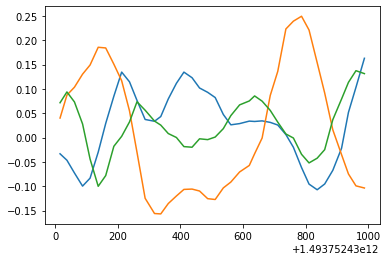

In [134]:
x = acc1[acc1.TAC_Reading == min]
x = x.sort_values(by=['time'])
fig, ax = plt.subplots()
ax.plot(x.time, x.x)
ax.plot(x.time, x.y)
ax.plot(x.time, x.z)

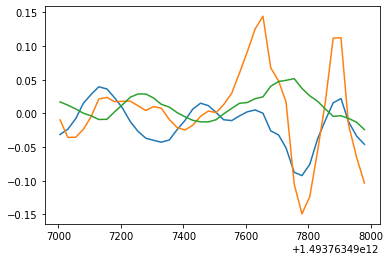

In [135]:
x = acc1[acc1.TAC_Reading == max]
x = x.sort_values(by=['time'])
fig, ax = plt.subplots()
ax.plot(x.time, x.x)
ax.plot(x.time, x.y)
ax.plot(x.time, x.z)

The one second data above wouldn't tell us much. Let's plot for 10 seconds since that would be the input for our prediction model. Interval for min TAC

In [240]:
x = acc1[acc1.TAC_Reading == min]
start, end = x.timestamp.iloc[0], x.timestamp.iloc[0]+9

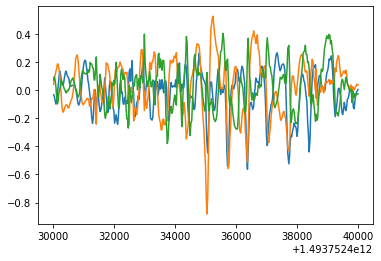

In [241]:
def plot_series(x):
    x = x.sort_values(by=['time'])
    fig, ax = plt.subplots()
    ax.plot(x.time, x.x)
    ax.plot(x.time, x.y)
    ax.plot(x.time, x.z)
min_tac_df = acc1[(start <= acc1.timestamp) & (acc1.timestamp <= end)]
plot_series(min_tac_df)

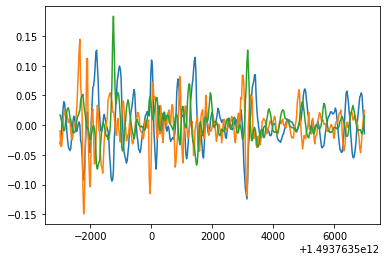

In [242]:
x = acc1[acc1.TAC_Reading == max]
start, end = x.timestamp.iloc[0], x.timestamp.iloc[0]+9
max_tac_df = acc1[(start <= acc1.timestamp) & (acc1.timestamp <= end)]
plot_series(max_tac_df)

Higher amplitude, more variance for max TAC

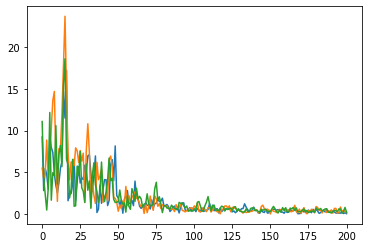

In [243]:
import numpy as np
fig, ax = plt.subplots()
ax.plot(np.abs(np.fft.rfft(min_tac_df.x)))
ax.plot(np.abs(np.fft.rfft(min_tac_df.y)))
ax.plot(np.abs(np.fft.rfft(min_tac_df.z)))

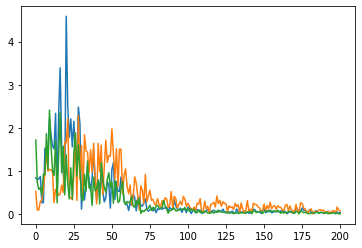

In [244]:
import numpy as np
fig, ax = plt.subplots()
ax.plot(np.abs(np.fft.rfft(max_tac_df.x)))
ax.plot(np.abs(np.fft.rfft(max_tac_df.y)))
ax.plot(np.abs(np.fft.rfft(max_tac_df.z)))

Clear higher frequency of movement in the case of Max TAC

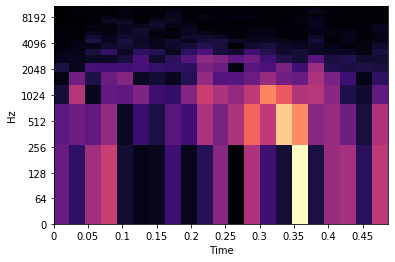

In [194]:
from librosa import display
display.specshow(librosa.stft(min_tac_df.x.values, n_fft=40, hop_length=20, center=False), y_axis='log', x_axis='time')

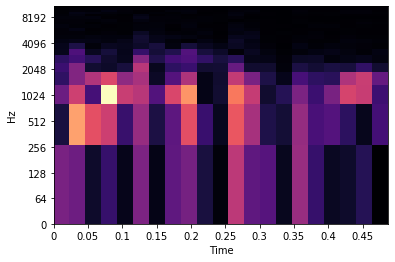

In [195]:
display.specshow(librosa.stft(max_tac_df.x.values, n_fft=40, hop_length=20, center=False), y_axis='log', x_axis='time')

In [245]:
max_tac_df.x.values.shape

(400,)

In [246]:
max_tac_df.timestamp.value_counts()

1493763506    40
1493763505    40
1493763504    40
1493763503    40
1493763502    40
1493763501    40
1493763500    40
1493763499    40
1493763498    40
1493763497    40
Name: timestamp, dtype: int64

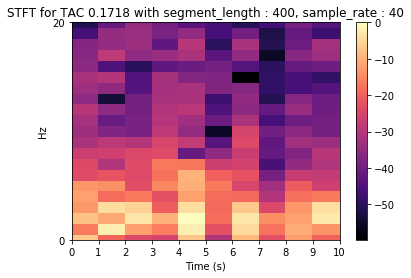

In [275]:
def plot_stft(df):
    sample_rate = 40
    segment_length = df.shape[0]
    frame = segment_length//10 # Segment_length constitutes 10 seconds. After cleaning, just assign sample_rate

    plt.title(f"STFT for TAC {np.round(df.TAC_Reading.dropna().unique()[0],4)} with segment_length : {segment_length}, sample_rate : {frame}")
    X = librosa.amplitude_to_db(np.abs(librosa.stft(df.x.values, n_fft=frame, hop_length=frame, center=False)), ref=np.max)
    display.specshow(X, y_axis='log', x_axis='s', sr=frame, hop_length=frame)
    plt.colorbar()

plot_stft(max_tac_df)

Cleaning: 
we have to make sure the sampling rate is consistent across the windows, right?
Process and even remove all windows with num_samples < 40

In [268]:
min_tac_df.TAC_Reading.dropna().unique()[0]

0.0416892364132567

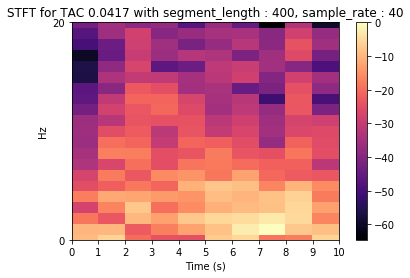

In [276]:
plot_stft(min_tac_df)

I want to check if sample_rate is consistent for all 10 second sections after TAC_Readings.
Should it be after, before or around??

In [281]:
TAC_Readings = np.sort(acc1.TAC_Reading.dropna().unique())

In [288]:
acc1

,time,pid,x,y,z,timestamp,TAC_Reading,datetime
0,1493735870653,BK7610,0.1261,-0.0078,-0.0243,1493735870,NaN,2017-05-02 07:37:50
1,1493735870679,BK7610,0.1336,-0.0697,-0.0446,1493735870,NaN,2017-05-02 07:37:50
2,1493735870703,BK7610,0.1443,-0.0474,-0.0447,1493735870,NaN,2017-05-02 07:37:50
3,1493735870729,BK7610,0.1255,-0.0038,0.0111,1493735870,NaN,2017-05-02 07:37:50
4,1493735870753,BK7610,0.1076,0.0032,0.0276,1493735870,NaN,2017-05-02 07:37:50
...,...,...,...,...,...,...,...,...
1225722,1493767770540,BK7610,-0.0784,-0.0161,0.1719,1493767770,NaN,2017-05-02 16:29:30
1225723,1493767770564,BK7610,-0.0395,-0.0816,0.1634,1493767770,NaN,2017-05-02 16:29:30
1225724,1493767770590,BK7610,0.0160,-0.0853,0.0906,1493767770,NaN,2017-05-02 16:29:30
1225725,1493767770614,BK7610,0.0901,-0.0767,0.0162,1493767770,NaN,2017-05-02 16:29:30


In [296]:
start_times = acc1[acc1['TAC_Reading'].isin(TAC_Readings)].timestamp.unique()
start_times.sort()
end_times = start_times+9

In [300]:
for start, end in zip(start_times, end_times):
    df = acc1[(start <= acc1.timestamp) & (acc1.timestamp <= end)]
    if df.shape[0] != 400:
        print(df.groupby('timestamp')['timestamp'].agg('count'))
        

timestamp
1493737046    39
1493737047    41
1493737048    39
1493737049    41
1493737050    39
1493737051    40
1493737052    40
1493737053    40
1493737054    40
1493737055    40
Name: timestamp, dtype: int64
timestamp
1493744843    38
1493744844    40
1493744845    40
1493744846    40
1493744847    40
1493744848    40
1493744849    40
1493744850    40
1493744851    40
1493744852    40
Name: timestamp, dtype: int64
timestamp
1493754265    40
1493754266    40
1493754267    40
1493754268    40
1493754269    40
1493754270    40
1493754271    40
1493754272    40
1493754273    39
1493754274    40
Name: timestamp, dtype: int64
timestamp
1493759807    39
1493759808    38
1493759809    40
1493759810    40
1493759811    40
1493759812    40
1493759813    40
1493759814    40
1493759815    40
1493759816    40
Name: timestamp, dtype: int64
timestamp
1493761652    40
1493761653    40
1493761654    40
1493761655    40
1493761656    40
1493761657    40
1493761658    40
1493761659    40
1493761660    

As we can see, there are multipe seconds that are sampled at less than 40 hz. This is something we will have to troubleshoot/finetune. For now, I'm going to split the segments by 10 and add overlap using hop_length so the effects of wrong sampling is minimized. Maybe resample the sections to 40 hz? Set a cut off around 35 hz. Discard if lower

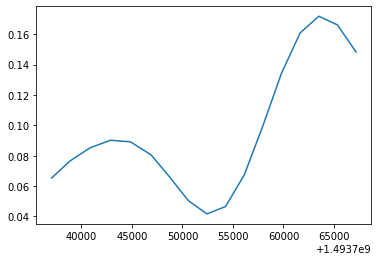

In [312]:
d = acc1[~acc1.TAC_Reading.isna()]
plt.plot(d.timestamp, d.TAC_Reading)

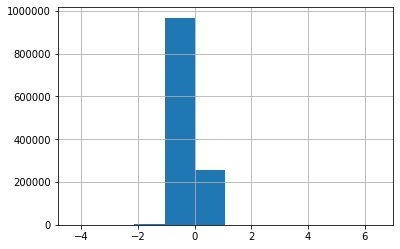

In [316]:
acc1.x.hist()

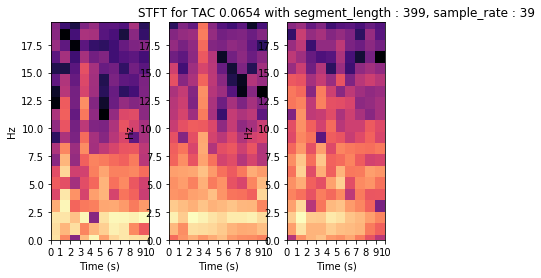

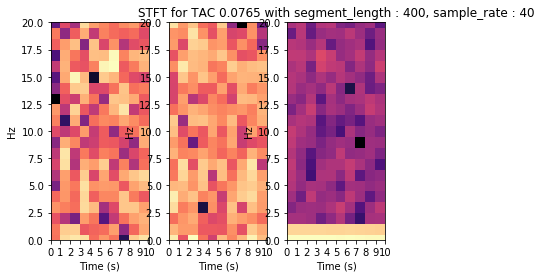

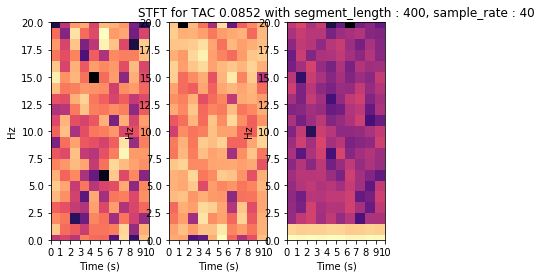

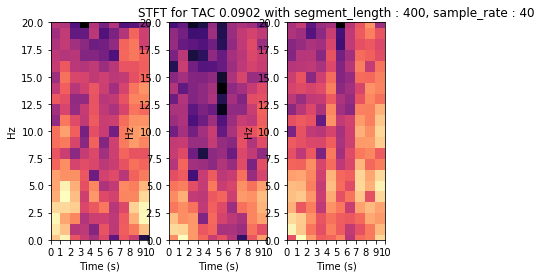

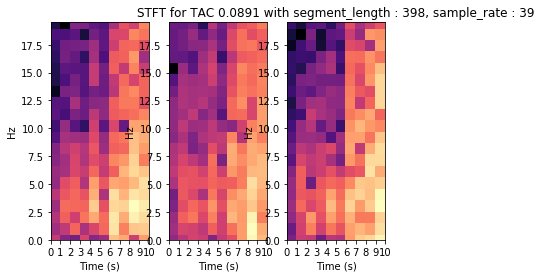

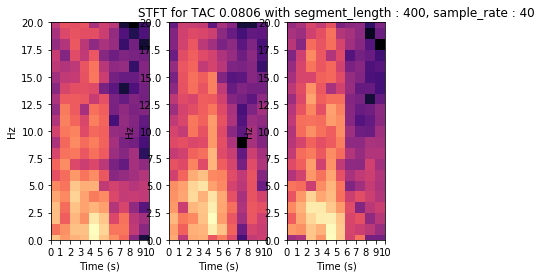

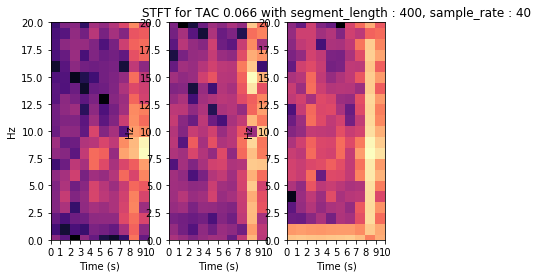

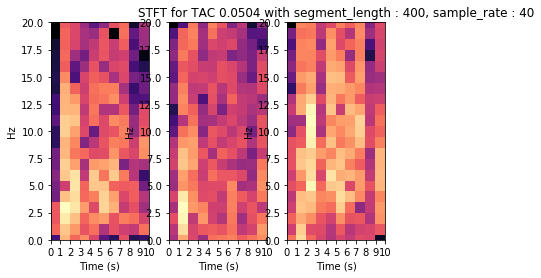

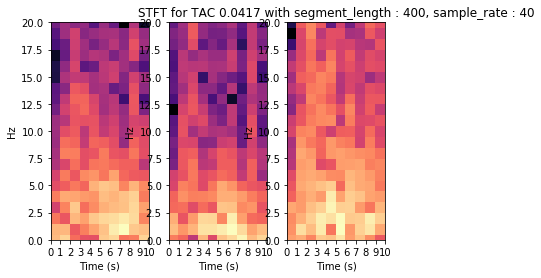

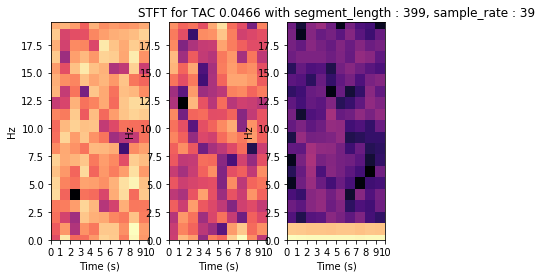

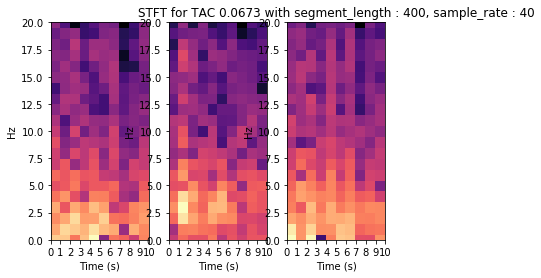

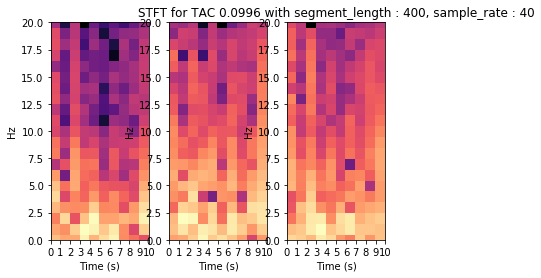

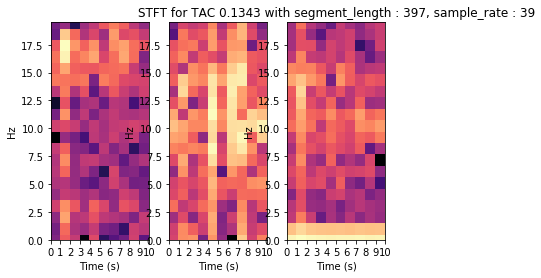

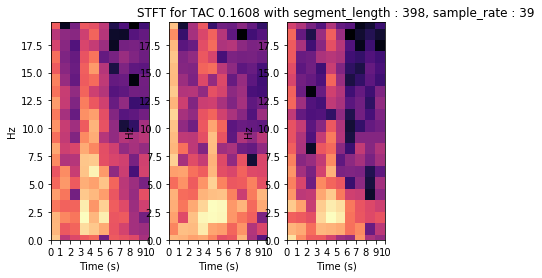

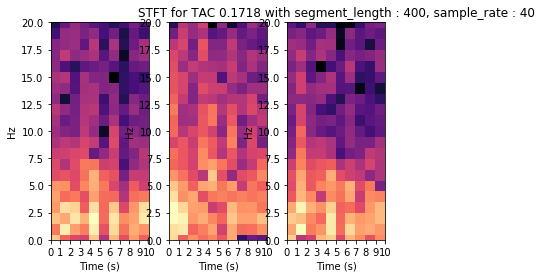

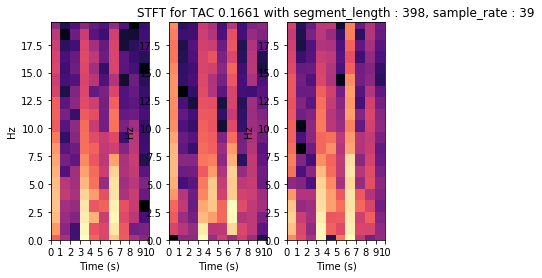

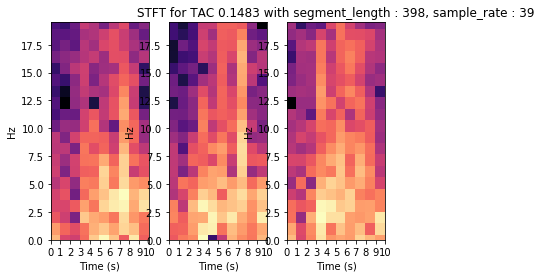

In [321]:
num_frames = 10   
def plot_stft(df):
    def plot_axis(vals, ax):
        X = librosa.amplitude_to_db(np.abs(librosa.stft(vals, n_fft=frame, hop_length=frame, center=False)), ref=np.max)
        display.specshow(X, y_axis='linear', x_axis='s', sr=frame, hop_length=frame, ax=ax)
    sample_rate = 40
    segment_length = df.shape[0]
    frame = segment_length//num_frames # Segment_length constitutes 10 seconds. After cleaning, just assign sample_rate
    fig, ax = plt.subplots(1,3)
    plt.title(f"STFT for TAC {np.round(df.TAC_Reading.dropna().unique()[0],4)} with segment_length : {segment_length}, sample_rate : {frame}")
    plot_axis(df.x.values, ax[0])
    plot_axis(df.y.values, ax[1])
    plot_axis(df.z.values, ax[2])
#     plt.colorbar()

for start, end in zip(start_times, end_times):
    df = acc1[(start <= acc1.timestamp) & (acc1.timestamp <= end)]
    plot_stft(df)
    plt.show()

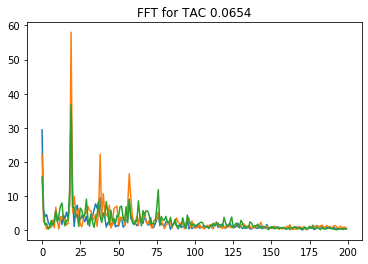

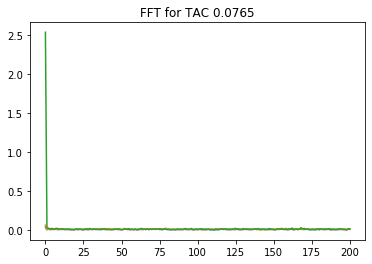

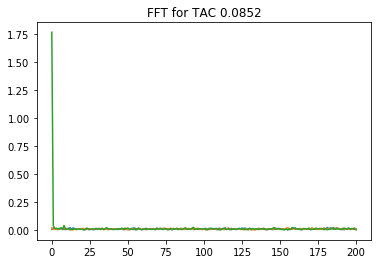

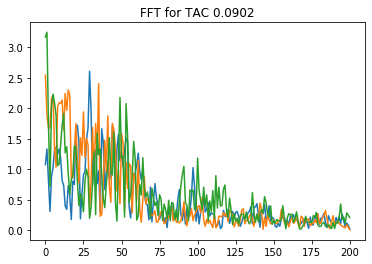

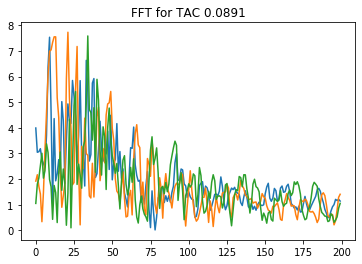

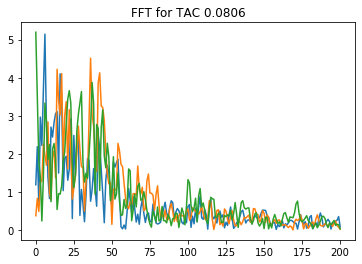

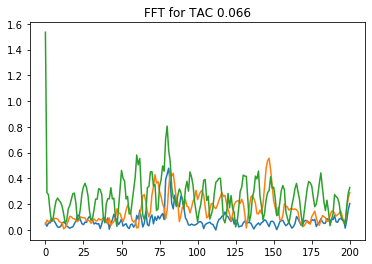

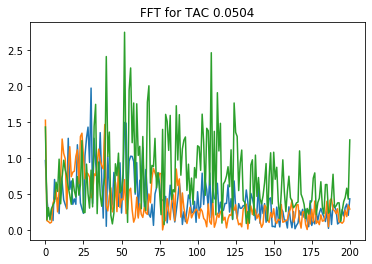

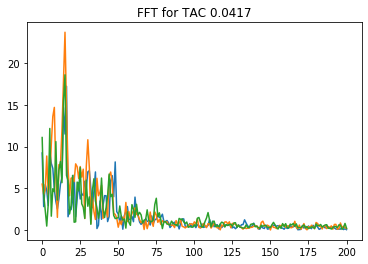

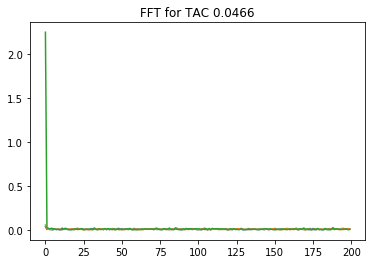

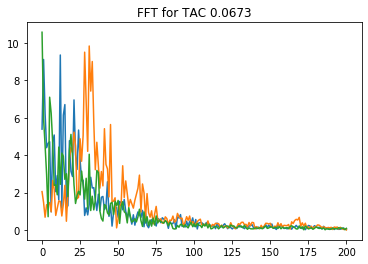

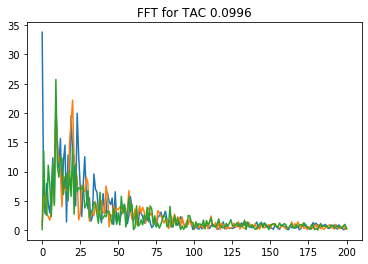

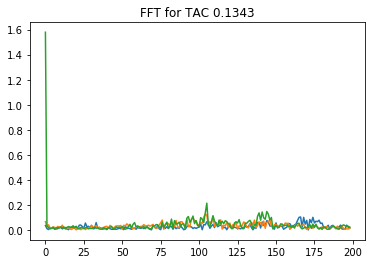

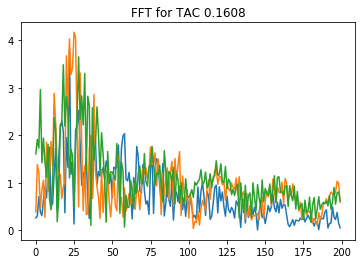

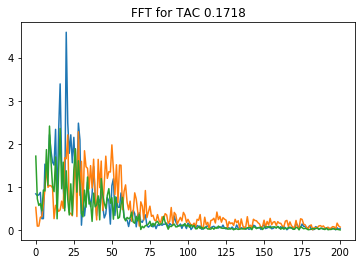

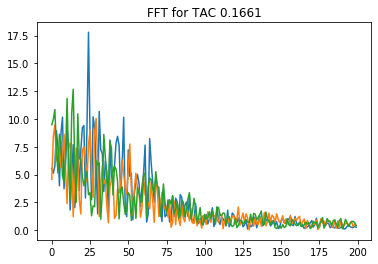

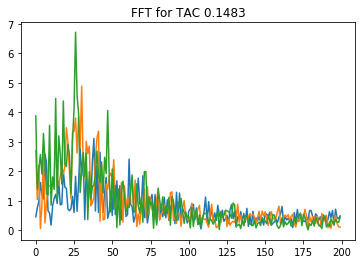

In [323]:
for start, end in zip(start_times, end_times):
    df = acc1[(start <= acc1.timestamp) & (acc1.timestamp <= end)]
    fig, ax = plt.subplots()
    plt.title(f"FFT for TAC {np.round(df.TAC_Reading.dropna().unique()[0],4)}")
    ax.plot(np.abs(np.fft.rfft(df.x)))
    ax.plot(np.abs(np.fft.rfft(df.y)))
    ax.plot(np.abs(np.fft.rfft(df.z)))
    plt.show()


Initial Idea:

Take stats values for each of the short term windows and create a feature set of 30 values for each stat.
Maybe also add amp feature like RMS per frame.
Maybe also add FFT over the entire 10 seconds. - splitting n calculating for frames is what STFT does. So no need to repeat it manually. Instead, Take min, max and mean FFT for each axis over 10 seconds.
If time, Mel spectro. MFCC too? For MFCC, they took covariance matrix 13x13, against self XxX, XxY and XxZ, YxY, ZxZ and YxZ?. then flattened it as features.

So, STFT covariance, STFT stats features and amp + fft.

Data: Shuffle and split into train test eval.

Then Dimensionality Reduction?

Since we are taking activity from t to t+9 seconds and matching with the TAC reading at t, our prediction will slightly conservative - well not really cos we're talking about just seconds. We can try repeating the experiment by using t as the mid(-ish) point. t-4 to t+5

We could also set TAC_Reading for all samples between t to t+30minutes-ish when the next reading is taken.

There are not too many matches when it comes to timestamp in seconds. Find nearest TAC reading if withing 10 mins or something? Maybe we can double the data set by taking the the previous 10 seconds and train to the same label
`acc_df[np.abs(acc_df.timestamp-1493798439) < 10]`
Timestamps missing - `set(starts) - set(bk_acc.timestamp.unique())`

In [328]:
import pandas as pd
import glob
import os

## Data Transformation

In [325]:
acc_df = pd.read_csv('data/all_accelerometer_data_pids_13.csv')
acc_df.head()

,time,pid,x,y,z
0,0,JB3156,0.0000,0.0000,0.0000
1,0,CC6740,0.0000,0.0000,0.0000
2,1493733882409,SA0297,0.0758,0.0273,-0.0102
3,1493733882455,SA0297,-0.0359,0.0794,0.0037
4,1493733882500,SA0297,-0.2427,-0.0861,-0.0163


In [332]:
pd.concat(pd.read_csv(f) for f in glob.glob(os.path.join('data', 'clean_tac', '*.csv')))
# we can't use the above since we need to distinguish between IDs to join with the main dataframe

,timestamp,TAC_Reading
0,1493727820,0.000215
1,1493728019,0.001716
2,1493729841,0.001921
3,1493731667,0.000569
4,1493731994,-0.001321
...,...,...
50,1493799481,0.000115
51,1493801311,-0.000309
52,1493803140,-0.000136
53,1493804971,0.000097


All TAC readings with 'pid' column

In [368]:
pids = pd.read_csv(os.path.join('data', 'phone_types.csv'))
all_tacs = pd.DataFrame()
def tac_readings(pid):
    global all_tacs
    fname = glob.glob(os.path.join('data', 'clean_tac', f'{pid}*.csv'))[0]
    df = pd.read_csv(fname)
    df['pid'] = pid
    all_tacs = all_tacs.append(df)
_ = pids.pid.apply(tac_readings)

In [403]:
# inflate dataframe to cover 10 seconds.
all_tacs_full = pd.DataFrame()

def inflate(row):
    global all_tacs_full
    for i in range(10):
        all_tacs_full = all_tacs_full.append([[row.timestamp+i, row.TAC_Reading, row.pid]])

all_tacs.apply(inflate, axis=1)
all_tacs_full.reset_index(drop=True, inplace=True)
all_tacs_full.columns = all_tacs.columns
all_tacs_full

,timestamp,TAC_Reading,pid
0,1493718714,-0.000482,BK7610
1,1493718715,-0.000482,BK7610
2,1493718716,-0.000482,BK7610
3,1493718717,-0.000482,BK7610
4,1493718718,-0.000482,BK7610
...,...,...,...
7145,1493805315,-0.002919,SF3079
7146,1493805316,-0.002919,SF3079
7147,1493805317,-0.002919,SF3079
7148,1493805318,-0.002919,SF3079


In [406]:
# now merge with accelerator df
# pd.merge(acc_df, all_tacs_full, on=[''])
acc_df['timestamp'] = acc_df.time // 1000

In [408]:
acc_df_merged = pd.merge(acc_df, all_tacs_full, on=['timestamp', 'pid'], how='left')

In [418]:
X = acc_df_merged[~acc_df_merged.TAC_Reading.isna()]

To create train/test set, we have to pivot and create 10 second signals for x,y,z. We have to take sections for each pid group, not just time based. Let's study BK7610 first

In [430]:
# sort by time
bks = bk.sort_values(by=['time'])

In [499]:
starts = all_tacs[all_tacs.pid=='BK7610'].timestamp

In [450]:
bk_acc = acc_df[(acc_df.timestamp.isin(starts)) & (acc_df.pid == 'BK7610')]

In [458]:
bk_acc.timestamp.unique()

array([1493737046, 1493738847, 1493740845, 1493742871, 1493744843,
       1493746883, 1493748731, 1493750580, 1493752430, 1493754265,
       1493756113, 1493757960, 1493759807, 1493761652, 1493763497,
       1493765341, 1493767186])

In [500]:
starts

0     1493718714
1     1493720697
2     1493721027
3     1493721357
4     1493721686
5     1493722016
6     1493722345
7     1493722674
8     1493723003
9     1493724832
10    1493725160
11    1493725474
12    1493725804
13    1493727636
14    1493729467
15    1493731296
16    1493733371
17    1493735217
18    1493737046
19    1493738847
20    1493740845
21    1493742871
22    1493744843
23    1493746883
24    1493748731
25    1493750580
26    1493752430
27    1493754265
28    1493756113
29    1493757960
30    1493759807
31    1493761652
32    1493763497
33    1493765341
34    1493767186
35    1493769031
36    1493770877
37    1493772722
38    1493774569
39    1493776416
40    1493778262
41    1493780109
42    1493781957
43    1493783788
44    1493785620
45    1493787453
46    1493789284
47    1493791117
48    1493792948
49    1493794779
50    1493796610
51    1493798439
52    1493800387
53    1493802438
54    1493804253
55    1493806084
56    1493807899
Name: timestamp, dtype: int64

In [516]:
pids.pid.map

0     6
1     6
2     6
3     6
4     6
5     6
6     6
7     6
8     6
9     6
10    6
11    6
12    6
Name: pid, dtype: int64

In [518]:
# for start in starts:
windowed = pd.DataFrame()
def segment(pid):
    global windowed
    starts = all_tacs[all_tacs.pid==pid].timestamp
    recorded_timestamps = set(X.timestamp)
    for start in starts:
        if start in recorded_timestamps:
            df = X[(X.pid==pid) & ((start <= X.timestamp) & (X.timestamp <= start+9))]
            df = df.sort_values(by=['time'])
            if df.shape[0] > 350 and df.shape[0] < 450:
                windowed = windowed.append([[df.iloc[0].pid, df.iloc[0].timestamp, df.x.values, df.y.values, df.z.values, df.iloc[0].TAC_Reading]])
            else:
                print(f"Bad 10 second window: with {df.shape[0]} samples starting at {start} for {pid}")
_ = pids.pid.map(segment)
windowed.columns = ['pid', 'start_time_s', 'x', 'y', 'z', 'TAC']

Bad 10 second window: with 0 samples starting at 1493737046 for BU4707
Bad 10 second window: with 0 samples starting at 1493738847 for BU4707
Bad 10 second window: with 0 samples starting at 1493740845 for BU4707
Bad 10 second window: with 0 samples starting at 1493742871 for BU4707
Bad 10 second window: with 0 samples starting at 1493756113 for BU4707
Bad 10 second window: with 0 samples starting at 1493757960 for BU4707
Bad 10 second window: with 0 samples starting at 1493759807 for BU4707
Bad 10 second window: with 0 samples starting at 1493761652 for BU4707
Bad 10 second window: with 0 samples starting at 1493763497 for BU4707
Bad 10 second window: with 0 samples starting at 1493765341 for BU4707
Bad 10 second window: with 0 samples starting at 1493767186 for BU4707
Bad 10 second window: with 106 samples starting at 1493741188 for CC6740
Bad 10 second window: with 195 samples starting at 1493772526 for CC6740
Bad 10 second window: with 37 samples starting at 1493776216 for CC6740
B

In [523]:
windowed.pid.value_counts()

CC6740    19
PC6771    19
BK7610    17
DK3500    16
HV0618    15
SF3079     9
DC6359     8
MJ8002     8
BU4707     6
MC7070     5
JR8022     3
JB3156     1
Name: pid, dtype: int64

In [560]:
windowed.shape

(126, 6)

How can we fill these values? SA0297 is not even in the pivoted dataframe

In [531]:
acc_df[np.abs(acc_df.timestamp-1493716723) < 10000]

,time,pid,x,y,z,timestamp


In [544]:
time_ms = acc_df[acc_df.pid=='SA0297'].time
times = time_ms // 1000
times = times.unique()
times

array([1493733882, 1493733883, 1493733884, ..., 1493824733, 1493824734,
       1493824735])

In [553]:
tac_times.shape

(58,)

In [557]:
times

array([149373388, 149373388, 149373388, ..., 149382473, 149382473,
       149382473])

In [559]:
times = acc_df[acc_df.pid=='SA0297'].time
times = times.unique() // 1000
for tac_time in tac_times:
    diff = np.abs(times - tac_time)
    idx = diff.argmin()
    val = diff.min()
    if val < 100:
        print(val, tac_time, times[idx])

0 1493734448 1493734448
0 1493747291 1493747291
24 1493749138 1493749114
15 1493752827 1493752812
0 1493756515 1493756515
0 1493758342 1493758342
0 1493765726 1493765726
0 1493767571 1493767571
0 1493769417 1493769417
0 1493778633 1493778633
0 1493780475 1493780475
0 1493791505 1493791505
0 1493793329 1493793329
0 1493795153 1493795153
0 1493796976 1493796976
0 1493798799 1493798799
0 1493800622 1493800622
0 1493802445 1493802445
0 1493804271 1493804271
0 1493806094 1493806094


In [ ]:
tac

In [546]:
tac_times = all_tacs[all_tacs.pid=='SA0297'].timestamp

(array([14.,  5.,  4.,  5.,  5.,  5.,  5.,  5.,  5.,  5.]),
 array([1.49371672e+09, 1.49372566e+09, 1.49373460e+09, 1.49374353e+09,
        1.49375247e+09, 1.49376141e+09, 1.49377035e+09, 1.49377928e+09,
        1.49378822e+09, 1.49379716e+09, 1.49380609e+09]),
 <a list of 10 Patch objects>)

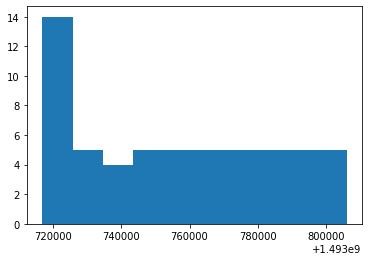

In [537]:
plt.hist(all_tacs[all_tacs.pid=='SA0297'].timestamp)

Class distribution balanced? all of our classifiers had a higher accuracy for sober data than intoxicated data and that the variance of our best classifier was high for intoxicated subjects

In [565]:
sa = all_tacs[all_tacs.pid=='SA0297']

In [567]:
sa['time'] = sa.timestamp.map(datetime.fromtimestamp)

<ipython-input-567-9302cf28dc94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sa['time'] = sa.timestamp.map(datetime.fromtimestamp)


In [568]:
sa

,timestamp,TAC_Reading,pid,time
0,1493716723,-0.010229,SA0297,2017-05-02 02:18:43
1,1493718546,-0.002512,SA0297,2017-05-02 02:49:06
2,1493718863,0.003249,SA0297,2017-05-02 02:54:23
3,1493719179,0.005404,SA0297,2017-05-02 02:59:39
4,1493719495,0.003377,SA0297,2017-05-02 03:04:55
5,1493719811,-0.001451,SA0297,2017-05-02 03:10:11
6,1493720127,-0.005816,SA0297,2017-05-02 03:15:27
7,1493720443,-0.006248,SA0297,2017-05-02 03:20:43
8,1493720759,-0.001631,SA0297,2017-05-02 03:25:59
9,1493721075,0.005332,SA0297,2017-05-02 03:31:15


In [575]:
f = interp1d(sa.timestamp, sa.TAC_Reading, kind='cubic')
f(1493806093)

array(-0.0212646)

In [587]:
sa.timestamp

0     1493716723
1     1493718546
2     1493718863
3     1493719179
4     1493719495
5     1493719811
6     1493720127
7     1493720443
8     1493720759
9     1493721075
10    1493721391
11    1493721707
12    1493723525
13    1493725342
14    1493727159
15    1493728977
16    1493730802
17    1493732624
18    1493734448
19    1493736273
20    1493738100
21    1493739942
22    1493741783
23    1493743607
24    1493745449
25    1493747291
26    1493749138
27    1493750985
28    1493752827
29    1493754671
30    1493756515
31    1493758342
32    1493760186
33    1493762037
34    1493763882
35    1493765726
36    1493767571
37    1493769417
38    1493771262
39    1493773106
40    1493774950
41    1493776792
42    1493778633
43    1493780475
44    1493782319
45    1493784159
46    1493786000
47    1493787840
48    1493789681
49    1493791505
50    1493793329
51    1493795153
52    1493796976
53    1493798799
54    1493800622
55    1493802445
56    1493804271
57    1493806094
Name: timestam

Since we don't have proper matches when it comes to joining the dataframes using timestamps or not enough samples to fill 10 second window, we can use an interpolation function to calculate TAC_Readings for ten second windows that actually have 40 samples. Linear interpolation worked the best as shown below

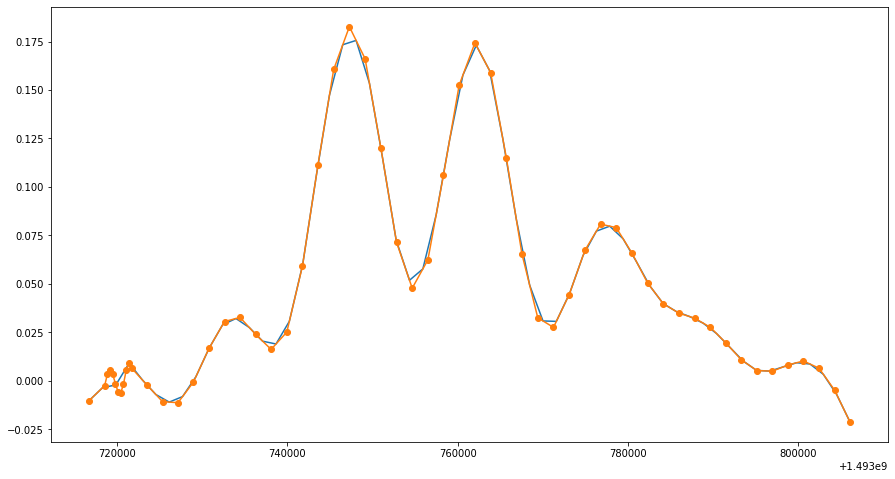

In [628]:
from scipy.interpolate import interp1d
ts = np.linspace(sa.timestamp.min(), sa.timestamp.max(), sa.timestamp.shape[0])
fig, ax = plt.subplots(figsize=(15,8))
f = interp1d(sa.timestamp, sa.TAC_Reading, kind='linear')
ax.plot(ts, f(ts))
ax.plot(sa.timestamp, sa.TAC_Reading, '-o')

Process:
- Take accelerometer data for pid
- extract data between start and end times of TAC measurement
- pick 10 second windows with 40 sample rate.
- Find interpolated TAC reading.
- Append to new dataframe with vectorized x,y and z
- Repeat for other participants.

In [644]:
pid = pids.pid[0]
acc_pid = acc_df[acc_df.pid == pid]

In [639]:
all_tacs.sort_values(by=['timestamp'], inplace=True)

In [640]:
tacs_pid = all_tacs[all_tacs.pid == pid]
start = tacs_pid.timestamp.min()
end = tacs_pid.timestamp.max()
expected_tac = interp1d(tacs_pid.timestamp, tacs_pid.TAC_Reading, kind='linear')

In [653]:
acc_pid[(start <= acc_pid.timestamp) & (acc_pid.timestamp <= end)]
acc_pid.sort_values(by=['time'], inplace=True)

,time,pid,x,y,z,timestamp
47136,1493735870653,BK7610,0.1261,-0.0078,-0.0243,1493735870
47138,1493735870679,BK7610,0.1336,-0.0697,-0.0446,1493735870
47140,1493735870703,BK7610,0.1443,-0.0474,-0.0447,1493735870
47142,1493735870729,BK7610,0.1255,-0.0038,0.0111,1493735870
47144,1493735870753,BK7610,0.1076,0.0032,0.0276,1493735870
...,...,...,...,...,...,...
6071104,1493767770540,BK7610,-0.0784,-0.0161,0.1719,1493767770
6071108,1493767770564,BK7610,-0.0395,-0.0816,0.1634,1493767770
6071112,1493767770590,BK7610,0.0160,-0.0853,0.0906,1493767770
6071117,1493767770614,BK7610,0.0901,-0.0767,0.0162,1493767770


In [691]:
counts = acc_pid.groupby('timestamp')['time'].count()
acc_pid['ten_seconds_group'] = acc_pid.timestamp//10
valid_groups = acc_pid.ten_seconds_group.value_counts()[acc_pid.ten_seconds_group.value_counts() == 400].index
valid_groups_acc_pid = acc_pid[acc_pid['ten_seconds_group'].isin(valid_groups)]

<ipython-input-691-eb6ce689580c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc_pid['ten_seconds_group'] = acc_pid.timestamp//10


In [712]:
grouped = valid_groups_acc_pid.groupby('ten_seconds_group').agg(lambda s: s.to_list())

In [717]:
# Checking if generated lists are in order. Groupby maintains order of records within the group.
(grouped.time.map(lambda x: (x == np.sort(x)).sum()) != 400).sum()

0

In [723]:
grouped = grouped[['x', 'y', 'z', 'timestamp']]
grouped['timestamp'] = grouped.timestamp.map(lambda x: x[0])

<ipython-input-723-b890f71fc07b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped['timestamp'] = grouped.timestamp.map(lambda x: x[0])


,x,y,z,timestamp
ten_seconds_group,,,,
149373588,"[0.0224, 0.0082, -0.0011, -0.0095, -0.0091, -0...","[-0.0621, -0.0527, -0.0283, 0.0126, 0.0251, 0....","[0.0079, 0.0808, 0.0743, 0.0312, 0.0332, 0.031...",1493735880
149373591,"[-0.0029, -0.0018, 0.0005, 0.0066, 0.0011, 0.0...","[-0.001, -0.0013, 0.0043, 0.0073, 0.0047, 0.00...","[0.0181, 0.0266, 0.0012, -0.0021, -0.0006, 0.0...",1493735910
149373598,"[0.0646, 0.0835, 0.0302, 0.0076, 0.0667, -0.14...","[-0.086, 0.0144, 0.0018, 0.033, 0.0343, 0.0606...","[-0.0198, -0.0241, -0.0026, -0.0142, 0.0720000...",1493735980
149373601,"[0.0583, 0.0749, 0.0544, 0.0213, 0.1168, 0.059...","[0.2059, 0.1118, 0.0066, 0.0502, 0.0, -0.0296,...","[0.2604, 0.1449, 0.1182, 0.3516, -0.0621, -0.1...",1493736010
149373603,"[0.1136, 0.2526, -0.1188, -0.0451, 0.0102, -0....","[-0.1317, -0.1245, 0.0064, 0.2391, 0.1133, 0.0...","[-0.4155, -0.8828, -0.1506, -0.0704, 0.1117, 0...",1493736030
...,...,...,...,...
149376768,"[0.0136, 0.0203, 0.0218, 0.0059, 0.0125, -0.00...","[0.0115, 0.0056, 0.0058, 0.0111, 0.0062, 0.007...","[0.0555, 0.0538, 0.0492, 0.0137, 0.0014, 0.004...",1493767680
149376771,"[0.0092, 0.0606, 0.0657, 0.0783, 0.1261, 0.143...","[-0.2421, -0.1816, -0.1108, -0.0826, -0.1122, ...","[0.019, 0.1136, 0.0556, -0.0113, -0.0436, -0.0...",1493767710
149376773,"[-0.0264, -0.0163, -0.012, -0.0028, 0.0229, -0...","[0.0908, 0.0718, 0.0666, 0.0627, 0.0113, 0.074...","[0.0161, 0.0165, -0.02, -0.0611, -0.0685, -0.1...",1493767730


In [733]:
grouped['tac'] = grouped.timestamp.map(lambda x: expected_tac(x))
grouped['pid'] = pid

<ipython-input-733-022325f835e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped['tac'] = grouped.timestamp.map(lambda x: expected_tac(x))


In [734]:
grouped

,x,y,z,timestamp,tac,pid
ten_seconds_group,,,,,,
149373588,"[0.0224, 0.0082, -0.0011, -0.0095, -0.0091, -0...","[-0.0621, -0.0527, -0.0283, 0.0126, 0.0251, 0....","[0.0079, 0.0808, 0.0743, 0.0312, 0.0332, 0.031...",1493735880,0.056993,BK7610
149373591,"[-0.0029, -0.0018, 0.0005, 0.0066, 0.0011, 0.0...","[-0.001, -0.0013, 0.0043, 0.0073, 0.0047, 0.00...","[0.0181, 0.0266, 0.0012, -0.0021, -0.0006, 0.0...",1493735910,0.057209,BK7610
149373598,"[0.0646, 0.0835, 0.0302, 0.0076, 0.0667, -0.14...","[-0.086, 0.0144, 0.0018, 0.033, 0.0343, 0.0606...","[-0.0198, -0.0241, -0.0026, -0.0142, 0.0720000...",1493735980,0.057711,BK7610
149373601,"[0.0583, 0.0749, 0.0544, 0.0213, 0.1168, 0.059...","[0.2059, 0.1118, 0.0066, 0.0502, 0.0, -0.0296,...","[0.2604, 0.1449, 0.1182, 0.3516, -0.0621, -0.1...",1493736010,0.057926,BK7610
149373603,"[0.1136, 0.2526, -0.1188, -0.0451, 0.0102, -0....","[-0.1317, -0.1245, 0.0064, 0.2391, 0.1133, 0.0...","[-0.4155, -0.8828, -0.1506, -0.0704, 0.1117, 0...",1493736030,0.058069,BK7610
...,...,...,...,...,...,...
149376768,"[0.0136, 0.0203, 0.0218, 0.0059, 0.0125, -0.00...","[0.0115, 0.0056, 0.0058, 0.0111, 0.0062, 0.007...","[0.0555, 0.0538, 0.0492, 0.0137, 0.0014, 0.004...",1493767680,0.142203,BK7610
149376771,"[0.0092, 0.0606, 0.0657, 0.0783, 0.1261, 0.143...","[-0.2421, -0.1816, -0.1108, -0.0826, -0.1122, ...","[0.019, 0.1136, 0.0556, -0.0113, -0.0436, -0.0...",1493767710,0.141835,BK7610
149376773,"[-0.0264, -0.0163, -0.012, -0.0028, 0.0229, -0...","[0.0908, 0.0718, 0.0666, 0.0627, 0.0113, 0.074...","[0.0161, 0.0165, -0.02, -0.0611, -0.0685, -0.1...",1493767730,0.141589,BK7610


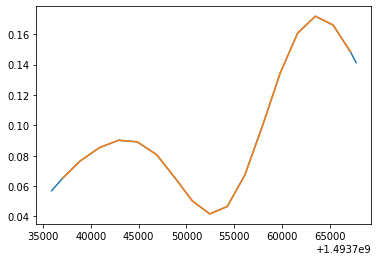

In [735]:
# The data with expected TAC coincides with the original values
plt.plot(grouped.timestamp, grouped.tac)
plt.plot(bk.timestamp, bk.TAC_Reading)

Perfect! Now, let's create the full converted data set using interpolation method for each pid

In [18]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import os
import glob
import matplotlib.pyplot as plt
import librosa

# setup acc_df
acc_df = pd.read_csv('data/all_accelerometer_data_pids_13.csv')
acc_df.sort_values(by=['time'], inplace=True)
# create column with timestamp in seconds
acc_df['timestamp'] = acc_df['time']//1000
# setup all_tacs
pids = pd.read_csv(os.path.join('data', 'phone_types.csv'))
all_tacs = pd.DataFrame()
def tac_readings(pid):
    global all_tacs
    fname = glob.glob(os.path.join('data', 'clean_tac', f'{pid}*.csv'))[0]
    df = pd.read_csv(fname)
    df['pid'] = pid
    all_tacs = all_tacs.append(df, ignore_index=True)
_ = pids.pid.apply(tac_readings)
all_tacs.sort_values(by=['timestamp'], inplace=True)

In [62]:
def extract_segments(pid):
    # get accelerometer readings for the pid
    acc_pid = acc_df[acc_df.pid == pid]
    # get TAC readings for the pid
    tacs_pid = all_tacs[all_tacs.pid == pid]
    # interpolation function for TAC readings of pid
    expected_tac = interp1d(tacs_pid.timestamp, tacs_pid.TAC_Reading, kind='linear')
    # get the start and end time for the TAC readings in seconds
    start = tacs_pid.timestamp.min()
    end = tacs_pid.timestamp.max()
    # extract accelerator readings in this time frame TAC has been active
    acc_pid = acc_pid[(start <= acc_pid.timestamp) & (acc_pid.timestamp <= end)]
    acc_pid = acc_pid.sort_values(by=['time'])
    # 10 seconds grouping window
    acc_pid['ten_seconds_group'] = acc_pid.timestamp//10
    # select groups with 40 Hz sampling rate
    valid_groups = acc_pid.ten_seconds_group.value_counts()[acc_pid.ten_seconds_group.value_counts() == 400].index
    valid_groups_acc_pid = acc_pid[acc_pid['ten_seconds_group'].isin(valid_groups)]
    grouped = valid_groups_acc_pid.groupby('ten_seconds_group').agg(lambda s: s.to_list())
    grouped = grouped[['x', 'y', 'z', 'timestamp']]
    grouped['timestamp'] = grouped.timestamp.map(lambda x: x[0])
    grouped['tac'] = grouped.timestamp.map(lambda x: expected_tac(x))
    grouped['pid'] = pid
    return grouped
X = pd.concat(pids.pid.map(extract_segments).to_list())

In [67]:
X.pid.value_counts()

BK7610    1402
PC6771    1344
CC6740     965
SF3079     604
BU4707     479
MC7070     372
MJ8002     331
JR8022     273
HV0618      91
DK3500      11
JB3156       2
Name: pid, dtype: int64

There are a lot of sections sampled at higher than 40 hz. For example, for pid `JB3156`
```
1493760428    78
1493760426    50
1493760424    50
1493760423    50
1493760421    50
1493760420    50
1493760429    49
1493760427    49
1493760425    49
1493760422    49
```

We can train twice. Once with just 40hz sampled records. Then including the resampled ones.

In [113]:
def extract_segments_with_resample(pid):
    # get accelerometer readings for the pid
    acc_pid = acc_df[acc_df.pid == pid]
    # get TAC readings for the pid
    tacs_pid = all_tacs[all_tacs.pid == pid]
    # interpolation function for TAC readings of pid
    expected_tac = interp1d(tacs_pid.timestamp, tacs_pid.TAC_Reading, kind='linear')
    # get the start and end time for the TAC readings in seconds
    start = tacs_pid.timestamp.min()
    end = tacs_pid.timestamp.max()
    # extract accelerator readings in this time frame TAC has been active
    acc_pid = acc_pid[(start <= acc_pid.timestamp) & (acc_pid.timestamp <= end)]
    acc_pid = acc_pid.sort_values(by=['time'])
    # 10 seconds grouping window
    acc_pid['ten_seconds_group'] = acc_pid.timestamp//10
    # select groups with 40 Hz sampling rate
    resample_groups = acc_pid.ten_seconds_group.value_counts()[acc_pid.ten_seconds_group.value_counts() > 400].index
    resample_groups_acc_pid = acc_pid[acc_pid['ten_seconds_group'].isin(resample_groups)]
    grouped = resample_groups_acc_pid.groupby('ten_seconds_group').agg(lambda s: s.to_list())
    grouped = grouped[['x', 'y', 'z', 'timestamp']]
    grouped['timestamp'] = grouped.timestamp.map(lambda x: x[0])
    grouped['tac'] = grouped.timestamp.map(lambda x: expected_tac(x))
    grouped['pid'] = pid
    grouped['x'] = grouped['x'].map(lambda x: librosa.resample(np.array(x), len(x), 400))
    grouped['y'] = grouped['y'].map(lambda x: librosa.resample(np.array(x), len(x), 400))
    grouped['z'] = grouped['z'].map(lambda x: librosa.resample(np.array(x), len(x), 400))
    return grouped
X_resampled_groups = pd.concat(pids.pid.map(extract_segments_with_resample).to_list())

In [114]:
X_resampled_groups.pid.value_counts()

JB3156    1725
CC6740    1340
PC6771     800
MJ8002     601
MC7070      99
SF3079      66
JR8022      52
BK7610       3
Name: pid, dtype: int64

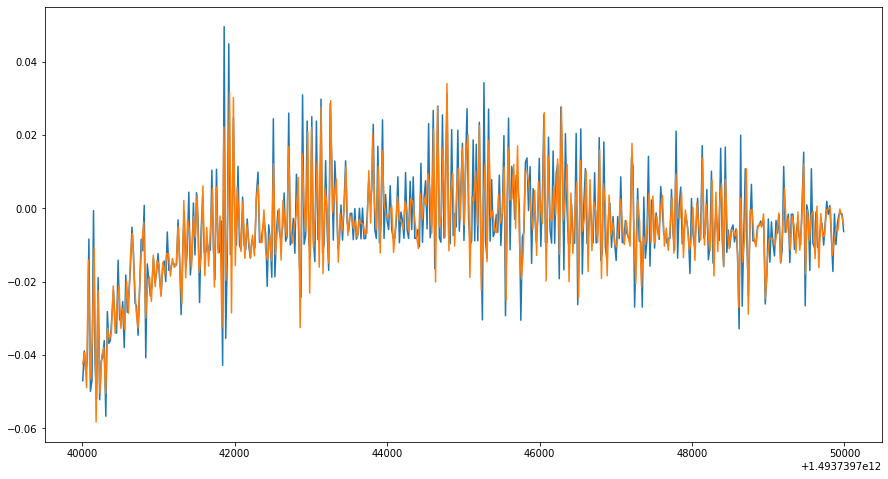

In [147]:
xs = acc_pid[(acc_pid.pid == 'JB3156') & (acc_pid.timestamp >= 1493739740) & (acc_pid.timestamp <= 1493739749)]
fig, ax = plt.subplots(figsize=(15,8))
ts = np.linspace(xs.time.min(), xs.time.max(), 496)
ax.plot(ts, xs.x)
ts = np.linspace(xs.time.min(), xs.time.max(), 400)
ax.plot(ts, librosa.resample(np.array(xs.x), len(xs), 400))
# ax.plot()

In [209]:
X['x'] = X.x.apply(np.array)
X['y'] = X.y.apply(np.array)
X['z'] = X.z.apply(np.array)

sample_rate = 40
frame_length = sample_rate
def rms(x):
    return librosa.feature.rms(x, frame_length=frame_length, hop_length=frame_length, center=False)[0]
# feature extraction
X['rms_x'] = X.x.apply(rms)
X['rms_y'] = X.y.apply(rms)
X['rms_z'] = X.z.apply(rms)

In [202]:
def avg_stft_per_frame(x):
    stft = librosa.amplitude_to_db(np.abs(librosa.stft(x, n_fft=frame_length, hop_length=frame_length, center=False)), ref=np.max)
    return stft.mean(axis=1)

X['stft_x'] = X.x.map(avg_stft_per_frame)
X['stft_y'] = X.y.map(avg_stft_per_frame)
X['stft_z'] = X.z.map(avg_stft_per_frame)

In [210]:
X.head()

,x,y,z,timestamp,tac,pid,rms_x,rms_y,rms_z,stft_x,stft_y,stft_z
ten_seconds_group,,,,,,,,,,,,
149373588,"[0.0224, 0.0082, -0.0011, -0.0095, -0.0091, -0...","[-0.0621, -0.0527, -0.0283, 0.0126, 0.0251, 0....","[0.0079, 0.0808, 0.0743, 0.0312, 0.0332, 0.031...",1493735880,0.056993,BK7610,"[0.02668377784347636, 0.01843838387711895, 0.0...","[0.05032887839004561, 0.04984726923312851, 0.0...","[0.05749420840397752, 0.03104115816138309, 0.0...","[-12.690154, -8.457663, -9.437422, -9.232827, ...","[-14.557266, -10.452653, -9.469296, -13.151808...","[-15.24328, -16.488579, -14.21153, -12.867627,..."
149373591,"[-0.0029, -0.0018, 0.0005, 0.0066, 0.0011, 0.0...","[-0.001, -0.0013, 0.0043, 0.0073, 0.0047, 0.00...","[0.0181, 0.0266, 0.0012, -0.0021, -0.0006, 0.0...",1493735910,0.057209,BK7610,"[0.006456411542025493, 0.0051890027943719596, ...","[0.015290626213468172, 0.006059269757982392, 0...","[0.016143497142812643, 0.013420152756209594, 0...","[-32.716454, -35.542168, -42.67136, -39.84577,...","[-21.00755, -22.575165, -30.808447, -28.94395,...","[-17.571064, -22.960625, -42.074394, -40.79059..."
149373598,"[0.0646, 0.0835, 0.0302, 0.0076, 0.0667, -0.14...","[-0.086, 0.0144, 0.0018, 0.033, 0.0343, 0.0606...","[-0.0198, -0.0241, -0.0026, -0.0142, 0.0720000...",1493735980,0.057711,BK7610,"[0.06327647074545166, 0.07134056875298934, 0.0...","[0.06002809342299654, 0.08257693079789294, 0.1...","[0.0506242876493092, 0.059847681659359206, 0.0...","[-23.541964, -15.163356, -14.66963, -15.326993...","[-23.604992, -16.514732, -13.416168, -15.34295...","[-11.972506, -10.769432, -12.049364, -10.28183..."
149373601,"[0.0583, 0.0749, 0.0544, 0.0213, 0.1168, 0.059...","[0.2059, 0.1118, 0.0066, 0.0502, 0.0, -0.0296,...","[0.2604, 0.1449, 0.1182, 0.3516, -0.0621, -0.1...",1493736010,0.057926,BK7610,"[0.09937839176601722, 0.11278838925173106, 0.0...","[0.13780493006420344, 0.16173243954136102, 0.1...","[0.2449404218376379, 0.2472596514799776, 0.234...","[-7.2069855, -4.4750957, -9.370684, -13.354648...","[-8.987995, -7.791894, -3.8397815, -10.41569, ...","[-8.856695, -6.635003, -2.31356, -12.053862, -..."
149373603,"[0.1136, 0.2526, -0.1188, -0.0451, 0.0102, -0....","[-0.1317, -0.1245, 0.0064, 0.2391, 0.1133, 0.0...","[-0.4155, -0.8828, -0.1506, -0.0704, 0.1117, 0...",1493736030,0.058069,BK7610,"[0.12217245393295496, 0.16650070345196744, 0.2...","[0.10492372348520615, 0.10399079045761696, 0.1...","[0.22854469201886968, 0.27389504011573484, 0.2...","[-18.974255, -13.41421, -10.928015, -12.39562,...","[-29.887726, -19.857798, -12.501796, -15.71216...","[-15.650968, -12.514348, -7.191958, -8.38401, ..."


In [229]:
(X.tac >= 0.08).mean()

0.4150493701055499

In [221]:
features = pd.concat([pd.DataFrame(X.rms_x.tolist()), pd.DataFrame(X.rms_y.tolist()), pd.DataFrame(X.rms_z.tolist()), pd.DataFrame(X.stft_x.tolist()), pd.DataFrame(X.stft_y.tolist()), pd.DataFrame(X.stft_z.tolist())], axis=1).values

In [273]:
y = (X.tac >= 0.08).values

PCA, Scaler, Shuffle, Train test eval split, Use the resampled versions, change class weights to make X.tac yes or no 50-50 instead of 60-40

In [274]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, shuffle=True, random_state=1337)

In [302]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5, random_state=1337, n_estimators=500, max_features=0.2)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=0.2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1337,
                       verbose=0, warm_start=False)

In [241]:
X_train[100]

array([ 2.11068476e-02,  2.36044655e-02,  2.44301105e-02,  2.43110333e-02,
        1.93447502e-02,  2.64259012e-02,  2.34842288e-02,  2.46327026e-02,
        2.07929486e-02,  2.35423184e-02,  2.87245108e-02,  2.69711729e-02,
        2.60485214e-02,  3.09897538e-02,  2.39454937e-02,  2.96201097e-02,
        3.10349848e-02,  2.77596889e-02,  3.00556329e-02,  2.75339933e-02,
        5.64556779e-01,  5.72706425e-01,  5.56920373e-01,  5.54359198e-01,
        5.64116598e-01,  5.60673210e-01,  5.57421636e-01,  5.49465770e-01,
        5.50305766e-01,  5.48944961e-01, -1.09332905e+01, -8.59086132e+00,
       -1.08094673e+01, -1.24936256e+01, -1.03879480e+01, -1.06405821e+01,
       -1.05657854e+01, -1.16178741e+01, -9.65331650e+00, -9.28530312e+00,
       -9.43036938e+00, -1.15600529e+01, -7.98996830e+00, -9.37686443e+00,
       -1.28414335e+01, -1.16734867e+01, -8.85894966e+00, -8.79610729e+00,
       -9.30371284e+00, -1.15374823e+01, -1.22721434e+01, -9.78160191e+00,
       -1.06906023e+01, -

In [249]:
features[100]

array([ 1.91865839e-03,  9.54856010e-04,  8.11942116e-04,  1.38735360e-03,
        1.72300609e-03,  1.98141364e-03,  6.16238590e-04,  9.15969432e-04,
        6.49037749e-04,  1.04259292e-03,  1.20176953e-03,  1.03682207e-03,
        8.50294067e-04,  7.22841615e-04,  1.46056496e-03,  1.10521491e-03,
        4.68774999e-04,  7.29040465e-04,  6.57837366e-04,  6.97674709e-04,
        7.54183333e-03,  7.70892340e-03,  7.30552873e-03,  7.82703648e-03,
        7.43200848e-03,  7.62941675e-03,  7.18070331e-03,  7.13924016e-03,
        7.32224351e-03,  7.30082187e-03, -1.98818302e+01, -1.42786503e+01,
       -1.47070827e+01, -1.56902542e+01, -1.53730850e+01, -1.62077236e+01,
       -1.85327682e+01, -1.74806328e+01, -1.53522158e+01, -1.56913481e+01,
       -1.47714357e+01, -1.60140228e+01, -1.21354723e+01, -1.42085667e+01,
       -1.05663280e+01, -1.04527464e+01, -1.38156071e+01, -1.24984064e+01,
       -1.13977604e+01, -1.29013157e+01, -1.81611748e+01, -1.08231812e+01,
       -1.23929310e+01, -

Making sure that everything looks aligned

In [278]:
X[X.rms_x.apply(lambda x: x[0] == X_train[100][0])].rms_x.values

array([array([0.02110685, 0.02360447, 0.02443011, 0.02431103, 0.01934475,
       0.0264259 , 0.02348423, 0.0246327 , 0.02079295, 0.02354232])],
      dtype=object)

In [279]:
X_train[100][:10]

array([0.02110685, 0.02360447, 0.02443011, 0.02431103, 0.01934475,
       0.0264259 , 0.02348423, 0.0246327 , 0.02079295, 0.02354232])

In [306]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, clf.predict(X_test), labels=None, target_names=['Sober', 'Intoxicated'], sample_weight=None, digits=2, output_dict=False, zero_division='warn'))

              precision    recall  f1-score   support

       Sober       0.87      0.73      0.80       685
 Intoxicated       0.69      0.84      0.76       490

    accuracy                           0.78      1175
   macro avg       0.78      0.79      0.78      1175
weighted avg       0.80      0.78      0.78      1175



In [304]:
accuracy_score(y_test, clf.predict(X_test))

0.7804255319148936

weighted: (685*.84+490*.67)/1175

macros: (.84+.67)/2

Future Steps:
- Train Neural Network on the STFT spectrograms